In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Hal pertama adalah membaca file train.csv kita menggunakan library pandas 

In [3]:
train = pd.read_csv('data/train.csv')

### kita lihat dulu sample datanya 

In [4]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Silahkan membaca data/data_description terlebih dahulu untuk mengetahui penjelasan mengenai datanya

#### Salah satu variable yang kita mau prediksi adalah harga rumah nya, nama column harga rumahnya adalah SalePrice. SalePrice ini masih dalam currency USD

In [5]:
train.SalePrice.head(5)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

#### Dari harga rumah ini, berapasih rata2 harganya. Kita bisa liat descriptive dari harga ini dengan describe

In [6]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Berapa sih dalam IDR ? (1 USD = 14.000 IDR) dalam satuan juta rupiah

In [7]:
(train.SalePrice * 14000).describe()

count    1.460000e+03
mean     2.532897e+09
std      1.112195e+09
min      4.886000e+08
25%      1.819650e+09
50%      2.282000e+09
75%      2.996000e+09
max      1.057000e+10
Name: SalePrice, dtype: float64

In [8]:
import seaborn as sns
%matplotlib inline

#### kita lihat distribusi datanya untuk harga nya 

/home/khairulimam/.virtualenvs/ldw1/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


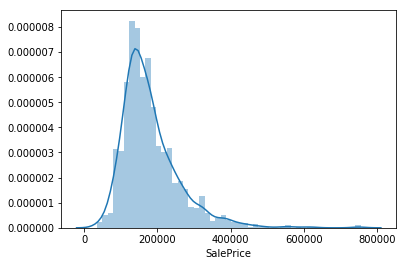

In [9]:
sns.distplot(train['SalePrice']);

#### kalau dalam rupiah ? 

/home/khairulimam/.virtualenvs/ldw1/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


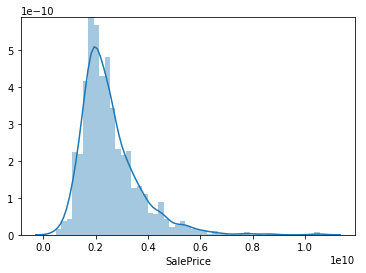

In [10]:
sns.distplot(train['SalePrice']* 14000);

In [11]:
def correl(var):
    data = pd.concat([train['SalePrice'], train[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#### Apakah ada hubungan antara 1 variable dengan variable yang lain ? Dalam hal ini yaitu variable dengan harga rumah. Kita bisa lihat melalui correlasi, pada tahap ini kita lihat melalui visualiasi dahulu

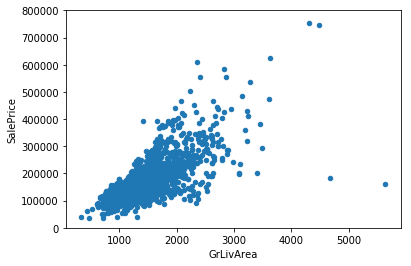

In [12]:
correl('GrLivArea')

#### luas lotarea sebagai contoh sebuah perumahan, ato kavling. Luas perumahan/lot/kavling korelasi nya tidak terlalu terlihat. Ada 1 lot area nya 200.000m2 tetapi harga nya kurang dari suatu lot yg luasnya dibawah 50.000m2

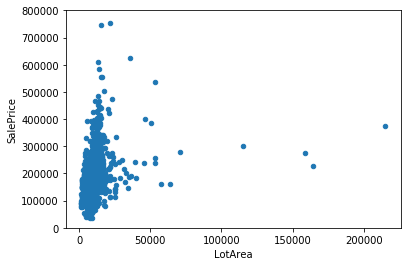

In [13]:
correl('LotArea')

#### Silahkan cari variable mana yang memiliki korelasi yang tinggi. Korelasi yang tinggi itu, semakin tinggi sumbu X, maka sumbu x nya juga tinggi, data nya berkumpul di tengah. Berikut nama-nama column nya :

In [14]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Tapi masa sebagai orang data kita pakai intuisi sih, ya ini kan variable nya ga terlalu banyak. Kalau ampe 40ribuan (ini real case di Mandiri) ?

### Box Size

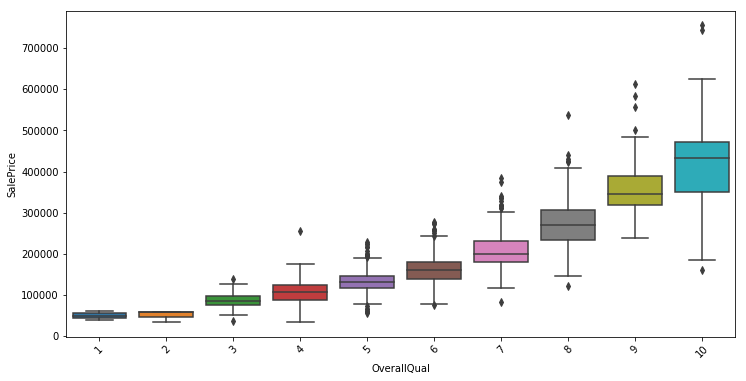

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train)
xt=plt.xticks(rotation=45)

### We can use, correlation matrix

In [15]:
matcor = train.corr()
matcor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


### Apa sih itu correlation matrix, yaitu matrix yang menghitung apakah 1 variable mirip dengan variable yang lain menggunakan skala -1 s/d 1. Sebagai contoh variable id, dengan variable id memiliki nilai 1 karena sama, jika variable nya < 0 berarti variable tersebut bertolak belakang

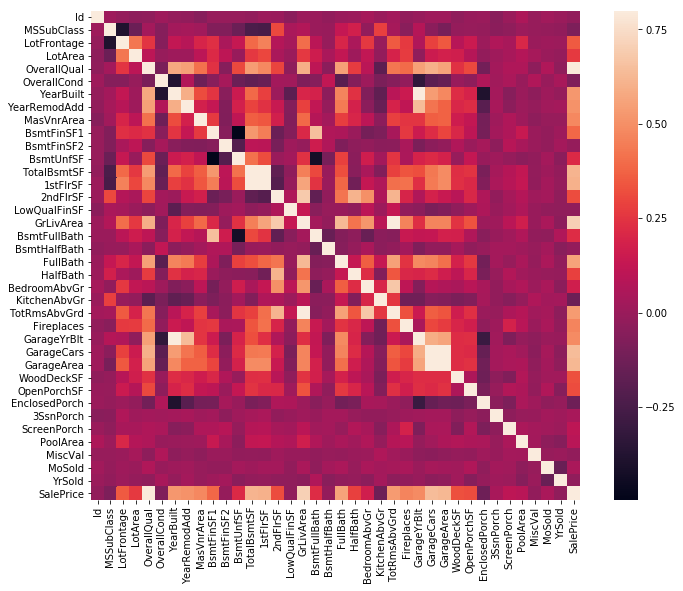

In [16]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matcor, vmax=.8, square=True);

#### semakin terang kotak tersebut, semakin tinggi hubungannya nya

### apakah ada variabel yang berkorelasi dengan salePrice ?

In [17]:
corr_with_price = matcor[matcor.index == 'SalePrice']
corr_with_price

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.38642,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.02119,0.046432,-0.028923,1.0


In [23]:
for k in  corr_with_price:
    if corr_with_price[k].SalePrice > .6: 
        print(k,corr_with_price[k].SalePrice)

OverallQual 0.7909816005838047
TotalBsmtSF 0.6135805515591944
1stFlrSF 0.6058521846919166
GrLivArea 0.7086244776126511
GarageCars 0.640409197258349
GarageArea 0.6234314389183598
SalePrice 1.0


#### Wow ternyata rating dari qualitas bangunan mempengaruhi dan yang pasti luas tanah juga mempengaruhi

#### kita coba ambil yang korelasi nya ckup tinggi dengan threshold 0.8 bisa kita lihat ternyata 

In [24]:
for i in matcor.index:
    for j,k in enumerate(matcor[i]):
        col_name = matcor.columns[j]
        if k >= 0.8 and col_name != i :
            print(i,col_name,k)

YearBuilt GarageYrBlt 0.8256674841743434
TotalBsmtSF 1stFlrSF 0.8195299750050355
1stFlrSF TotalBsmtSF 0.8195299750050355
GrLivArea TotRmsAbvGrd 0.8254893743088377
TotRmsAbvGrd GrLivArea 0.8254893743088377
GarageYrBlt YearBuilt 0.8256674841743434
GarageCars GarageArea 0.8824754142814603
GarageArea GarageCars 0.8824754142814603


### Masih banyak lagi yang bsa di explore dari data ini silahkan dilanjutakan ya